# Ridge Regression with Non-invertible Matrix

This notebook demonstrates how Ridge Regression handles cases where features are dependent (X2 = 2X1), making the normal equation non-invertible. We'll:
1. Create a dataset with dependent features
2. Show why OLS fails (non-invertible matrix)
3. Solve using Ridge Regression
4. Visualize the solution in 3D

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [2]:
# Create dataset with dependent features (X2 = 2X1)
X1 = np.array([1, 2, 3, 4])
X2 = 2 * X1  # Dependent feature
Y = np.array([5, 9, 13, 17])

# Create design matrix X
X = np.column_stack([X1, X2])

print("X1:", X1)
print("X2:", X2)
print("Y:", Y)
print("\nDesign matrix X:\n", X)

X1: [1 2 3 4]
X2: [2 4 6 8]
Y: [ 5  9 13 17]

Design matrix X:
 [[1 2]
 [2 4]
 [3 6]
 [4 8]]


In [3]:
# Calculate X^T X
XTX = X.T @ X
print("X^T X:\n", XTX)

# Calculate determinant
det = np.linalg.det(XTX)
print("\nDeterminant of X^T X:", det)
print("This is effectively zero, showing the matrix is non-invertible")

# Try Ridge Regression solution
lambda_ridge = 1.0  # regularization parameter
XTX_ridge = XTX + lambda_ridge * np.eye(2)
beta_ridge = np.linalg.inv(XTX_ridge) @ X.T @ Y

print("\nRidge Regression coefficients:", beta_ridge)

X^T X:
 [[ 30  60]
 [ 60 120]]

Determinant of X^T X: 0.0
This is effectively zero, showing the matrix is non-invertible

Ridge Regression coefficients: [0.86092715 1.7218543 ]


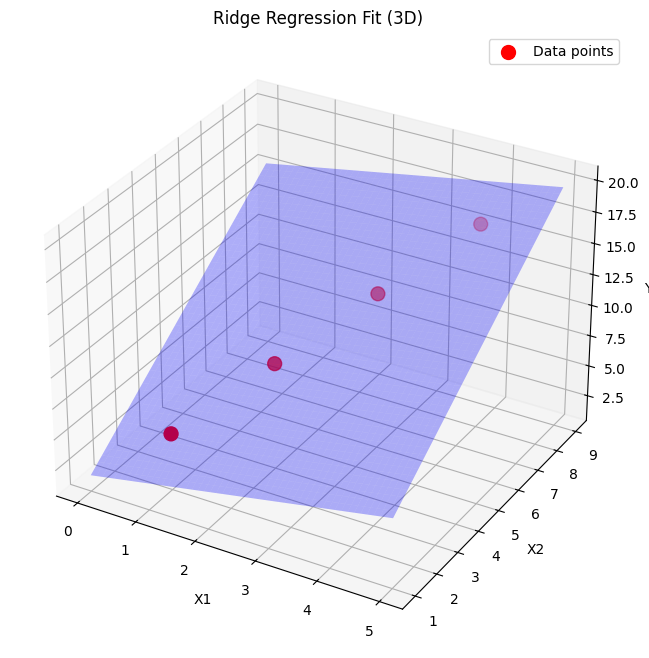


Predicted values: [ 4.30463576  8.60927152 12.91390728 17.21854305]
Actual values: [ 5  9 13 17]


In [4]:
# Create 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original points
ax.scatter(X1, X2, Y, c='r', marker='o', s=100, label='Data points')

# Create a mesh grid for the plane
x1_range = np.linspace(min(X1)-1, max(X1)+1, 50)
x2_range = np.linspace(min(X2)-1, max(X2)+1, 50)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Y_grid = beta_ridge[0] * X1_grid + beta_ridge[1] * X2_grid

# Plot the fitted plane
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.3, color='b')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Ridge Regression Fit (3D)')
plt.legend()
plt.show()

# Calculate and print predictions
Y_pred = X @ beta_ridge
print("\nPredicted values:", Y_pred)
print("Actual values:", Y)